Jamison Hunter

June 20, 2023

Coding Dojo

# Neural Network Core Assignment

Now, put neural networks into action. You are tasked with building a neural network using data from this kaggle competition. To complete the assignment, you will train and evaluate your model using only the train.csv. Remember, with Kaggle competitions; the test.csv does not include values for the target! The test.csv is only used for the competition, and you cannot evaluate your model using the test.csv without submitting your predictions to Kaggle.

# Load & Inspect Data

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import metrics
from sklearn.impute import SimpleImputer
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-84-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-84-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


In [2]:
# connecting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# loading Kaggle sample submission for comparison
path_sample = "/content/drive/MyDrive/sample_submission.csv"
sdf = pd.read_csv(path_sample)
sdf.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
path = "/content/drive/MyDrive/train.csv"
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The Alley column only has 91 non-null values. Therefore, I'm going to remove this column.

In [5]:
# dropping columns with too little data
df = df.drop(columns = ["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 1460 rows and 76 columns.


In [8]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [9]:
# displaying the percentage of missing data by column
df.isna().sum()/len(df)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 76, dtype: float64

# Train Test Split

In [14]:
X = df.drop(columns = ["SalePrice"])
y = df["SalePrice"]

In [15]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


In [16]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [19]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Preprocessor

In [ ]:
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
# Prepare separate processing pipelines for numeric and categorical data
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)
# Create ColumnSelectors for the the numeric and categorical data
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Combine the Pipelines and ColumnSelectors into tuples for the ColumnTransformer
cat_tuple = (cat_pipe, cat_selector)
num_tuple = (num_pipe, num_selector)
# Create the preprocessing ColumnTransformer
preprocessor = make_column_transformer(cat_tuple, num_tuple, remainder='drop')
preprocessor

In [110]:
# process the data
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(1095, 267)

# Model One

In [111]:
# defining neural network
# Save the number of features we have as our input shape
input_shape = X_train_proc.shape[1]
input_shape

267

In [184]:
# Sequential model
model = Sequential()

# First hidden layer
model.add(Dense(X_train_proc.shape[1], # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(X_train_proc.shape[1]-10, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
# Output layer
model.add(Dense(1, activation = 'linear'))
# Compile
model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
# Fit the model
history = model.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 39074082816.0000 - mean_absolute_error: 181668.8125 - root_mean_squared_error: 197671.6562 - val_loss: 38818430976.0000 - val_mean_absolute_error: 178375.0312 - val_root_mean_squared_error: 197023.9375
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 38823559168.0000 - mean_absolute_error: 181029.8281 - root_mean_squared_error: 197036.9531 - val_loss: 38259625984.0000 - val_mean_absolute_error: 176924.8125 - val_root_mean_squared_error: 195600.6875
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 37680480256.0000 - mean_absolute_error: 178062.4531 - root_mean_squared_error: 194114.6094 - val_loss: 36358086656.0000 - val_mean_absolute_error: 171940.3125 - val_root_mean_squared_error: 190677.9688
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 34715635712.0000 - mean_absolute_error: 170155.4219 - root_mean_squared_error: 186321.3281 - val_los

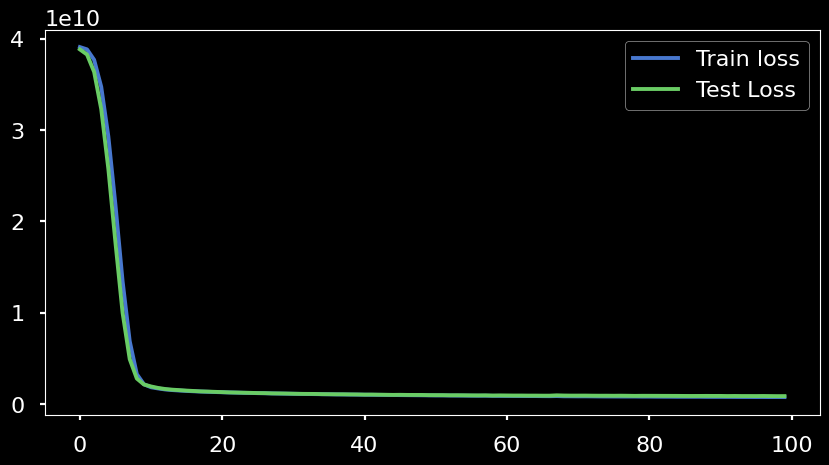

In [185]:
# Visualize the loss
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [186]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

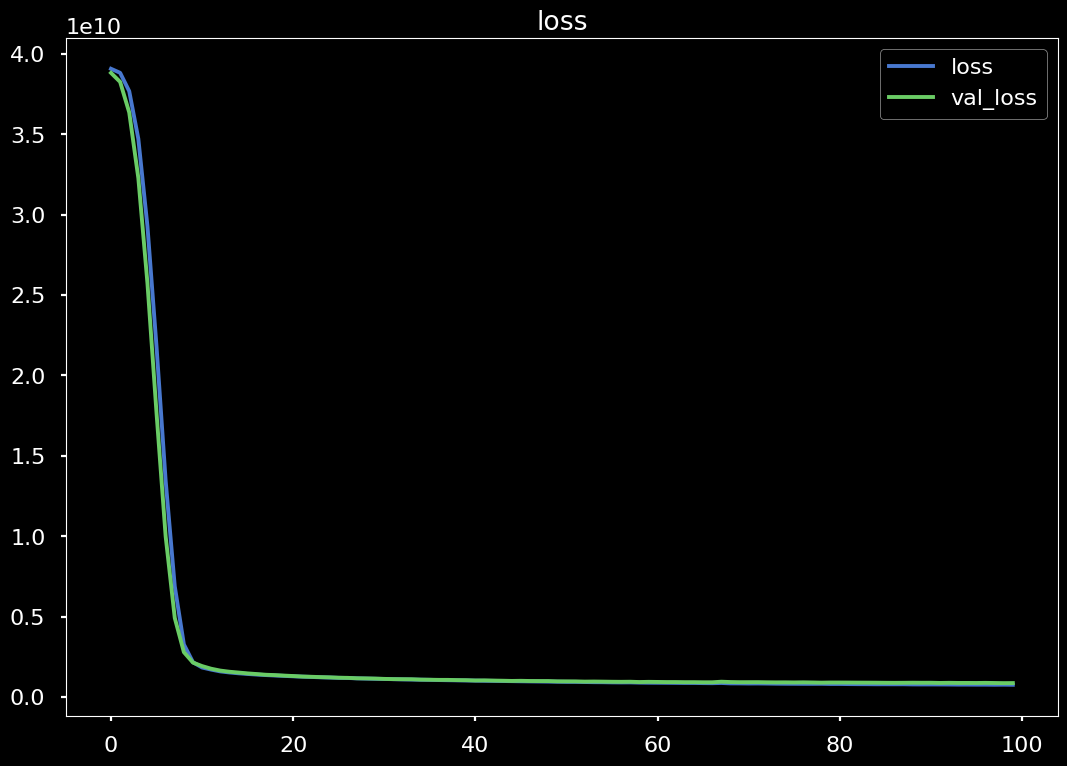

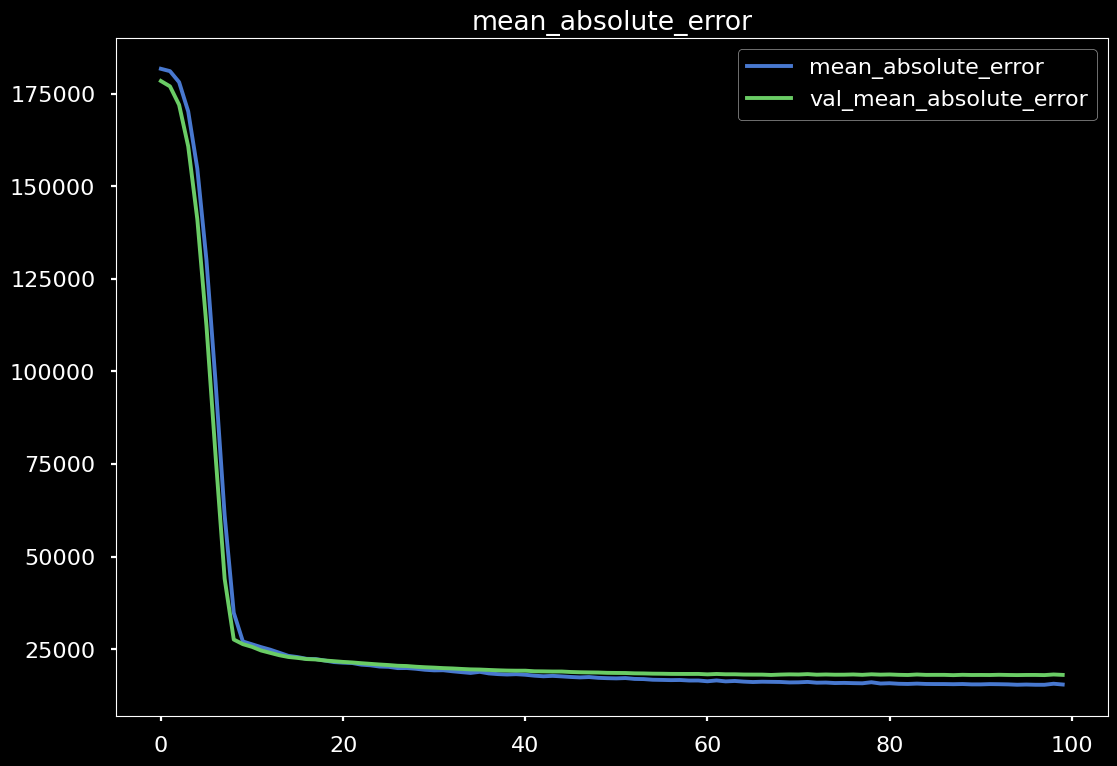

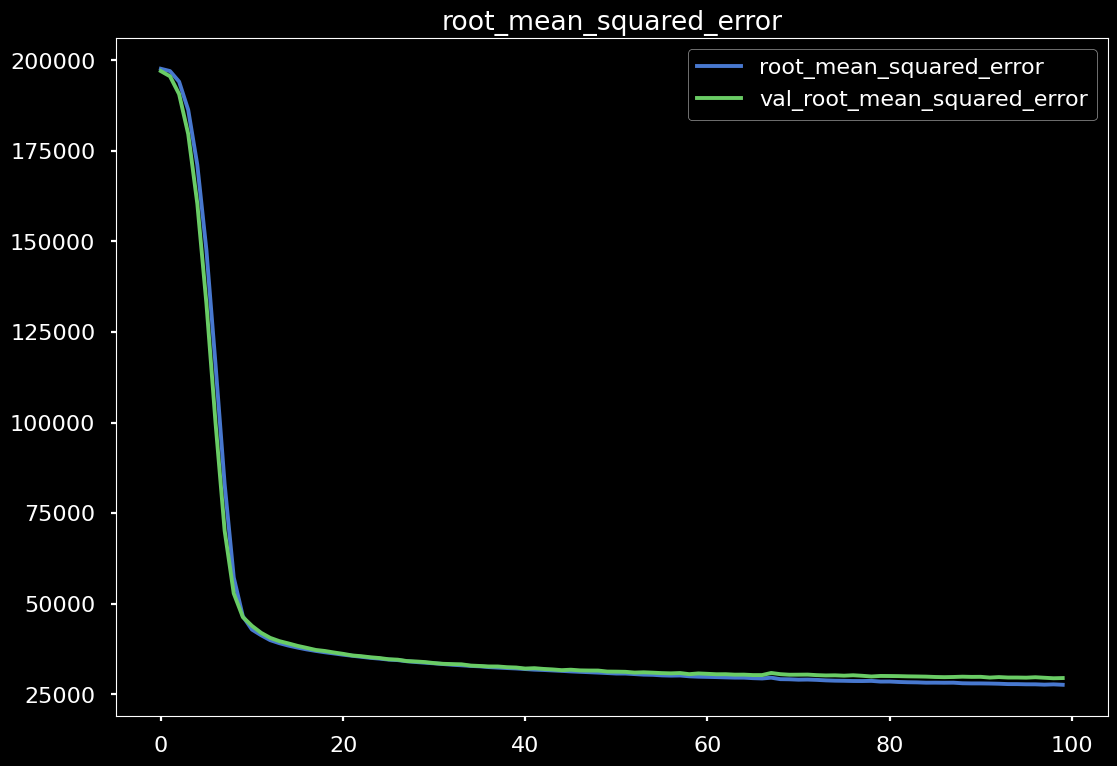

In [187]:
plot_history(history)

In [188]:
# evaluate model

y_pred = model.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')


12/12 [==============================] - 0s 2ms/step
final RMSE: 29450.56390041244
final MAE: 18130.149743150683
final R2: 0.8761888008691576


# Model Two

I will decrease the number of nodes in order to lower the complexity.

In [192]:
# Sequential model
model2 = Sequential()

# First hidden layer
model2.add(Dense(X_train_proc.shape[1]-50, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model2.add(Dense(X_train_proc.shape[1]-100, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?

# Output layer
model2.add(Dense(1, activation = 'linear'))
# Compile
model2.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
# Fit the model
history2 = model2.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 39078436864.0000 - mean_absolute_error: 181680.0938 - root_mean_squared_error: 197682.6719 - val_loss: 38838902784.0000 - val_mean_absolute_error: 178428.0938 - val_root_mean_squared_error: 197075.8750
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 38919794688.0000 - mean_absolute_error: 181277.8906 - root_mean_squared_error: 197281.0000 - val_loss: 38496256000.0000 - val_mean_absolute_error: 177541.6719 - val_root_mean_squared_error: 196204.6250
Epoch 3/100
35/35 [==============================] - 0s 6ms/step - loss: 38228807680.0000 - mean_absolute_error: 179502.5469 - root_mean_squared_error: 195521.8906 - val_loss: 37361401856.0000 - val_mean_absolute_error: 174589.2969 - val_root_mean_squared_error: 193290.9844
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 36462235648.0000 - mean_absolute_error: 174855.7812 - root_mean_squared_error: 190950.8750 - val_loss

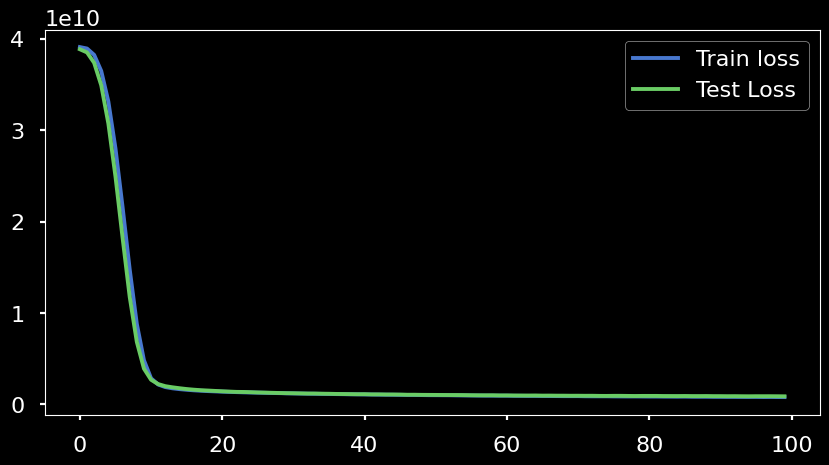

In [193]:
# Visualize the loss
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Test Loss')
plt.legend();

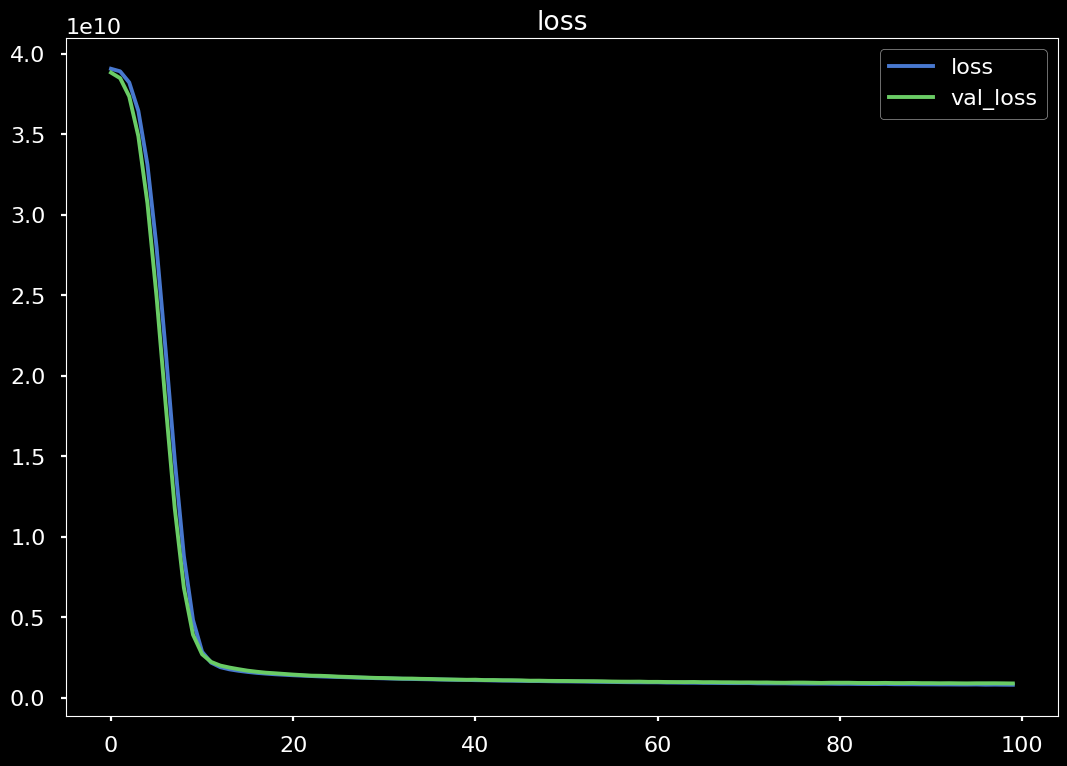

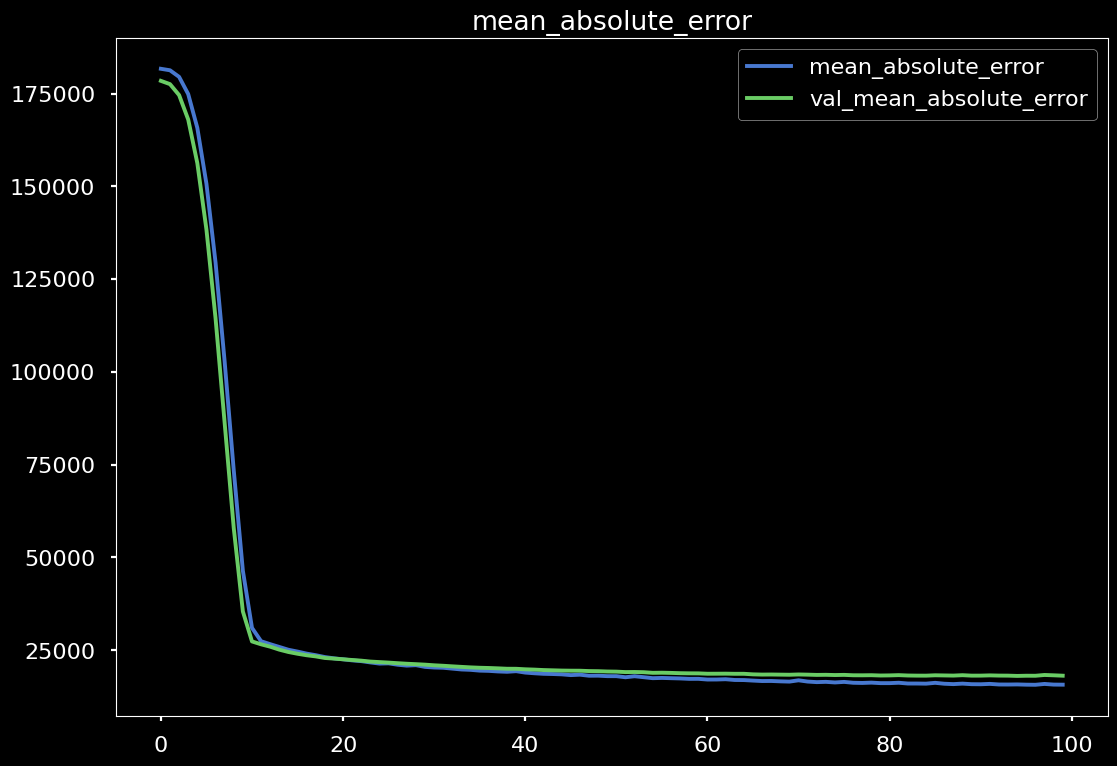

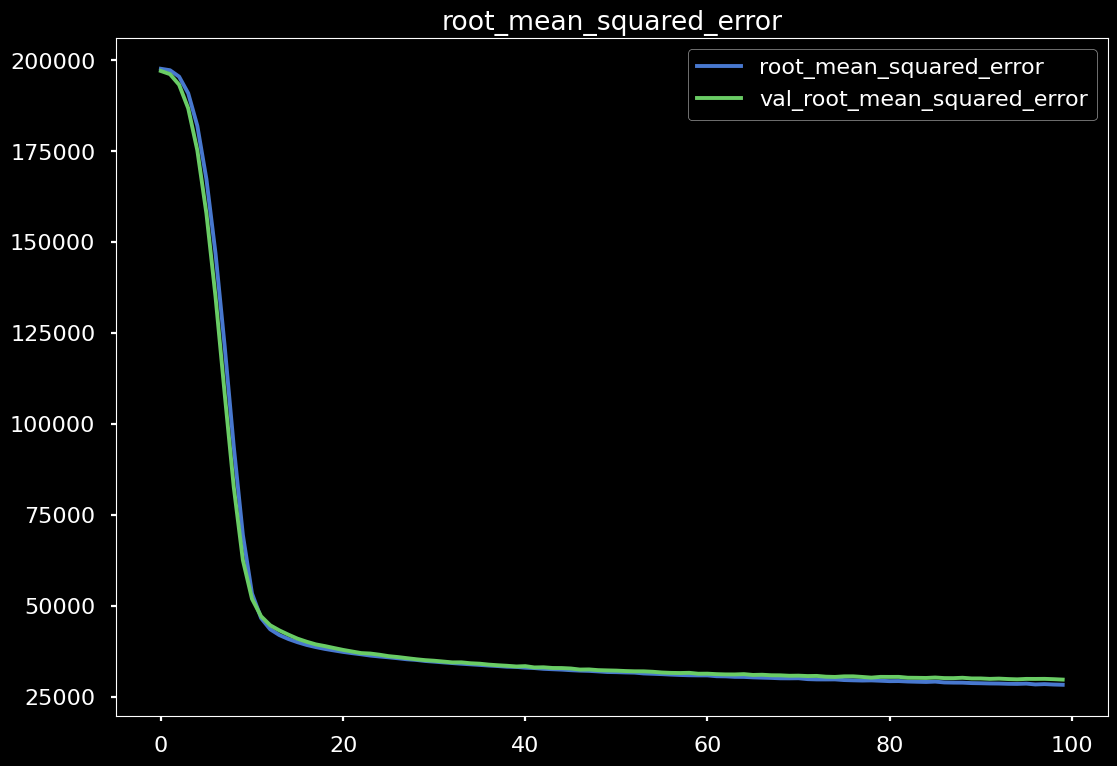

In [194]:
plot_history(history2)

In [195]:
# evaluate model

y_pred = model2.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

12/12 [==============================] - 0s 2ms/step
final RMSE: 29673.866368632072
final MAE: 18148.690571489726
final R2: 0.8743041400908086


Results in terms of error are identical to the previous model.

# Model Three

Next, I will implement early stopping.

In [197]:
# Sequential model
model3 = Sequential()

# First hidden layer
model3.add(Dense(X_train_proc.shape[1], # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model3.add(Dense(X_train_proc.shape[1]-10, # How many neurons you have in your second hidden layer
                activation = 'linear')) # What activation function are you using?

# Early Stopping
early_stopping = EarlyStopping(patience = 10)
# Output layer
model3.add(Dense(1, activation = 'linear'))
# Compile
model3.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])
# Fit the model
history3 = model3.fit(X_train_proc, y_train,
                    validation_data = (X_test_proc, y_test),
                    epochs=100, callbacks = [early_stopping])

Epoch 1/100
35/35 [==============================] - 2s 17ms/step - loss: 39057846272.0000 - mean_absolute_error: 181625.8906 - root_mean_squared_error: 197630.5781 - val_loss: 38751449088.0000 - val_mean_absolute_error: 178201.7812 - val_root_mean_squared_error: 196853.8750
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 38555168768.0000 - mean_absolute_error: 180346.2500 - root_mean_squared_error: 196354.7031 - val_loss: 37639966720.0000 - val_mean_absolute_error: 175311.6875 - val_root_mean_squared_error: 194010.2188
Epoch 3/100
35/35 [==============================] - 0s 10ms/step - loss: 36298186752.0000 - mean_absolute_error: 174476.6562 - root_mean_squared_error: 190520.8281 - val_loss: 33987745792.0000 - val_mean_absolute_error: 165514.1406 - val_root_mean_squared_error: 184357.6562
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 30791841792.0000 - mean_absolute_error: 159126.3594 - root_mean_squared_error: 175476.0469 - val_lo

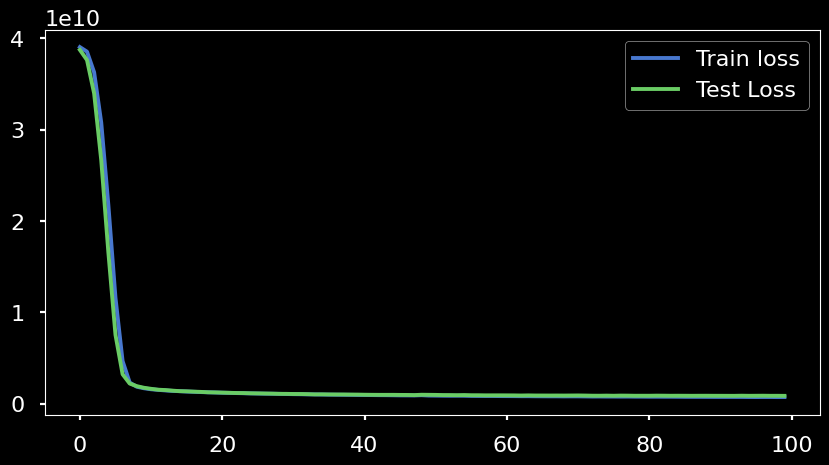

In [198]:
# Visualize the loss
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(history3.history['loss'], label='Train loss')
plt.plot(history3.history['val_loss'], label='Test Loss')
plt.legend();

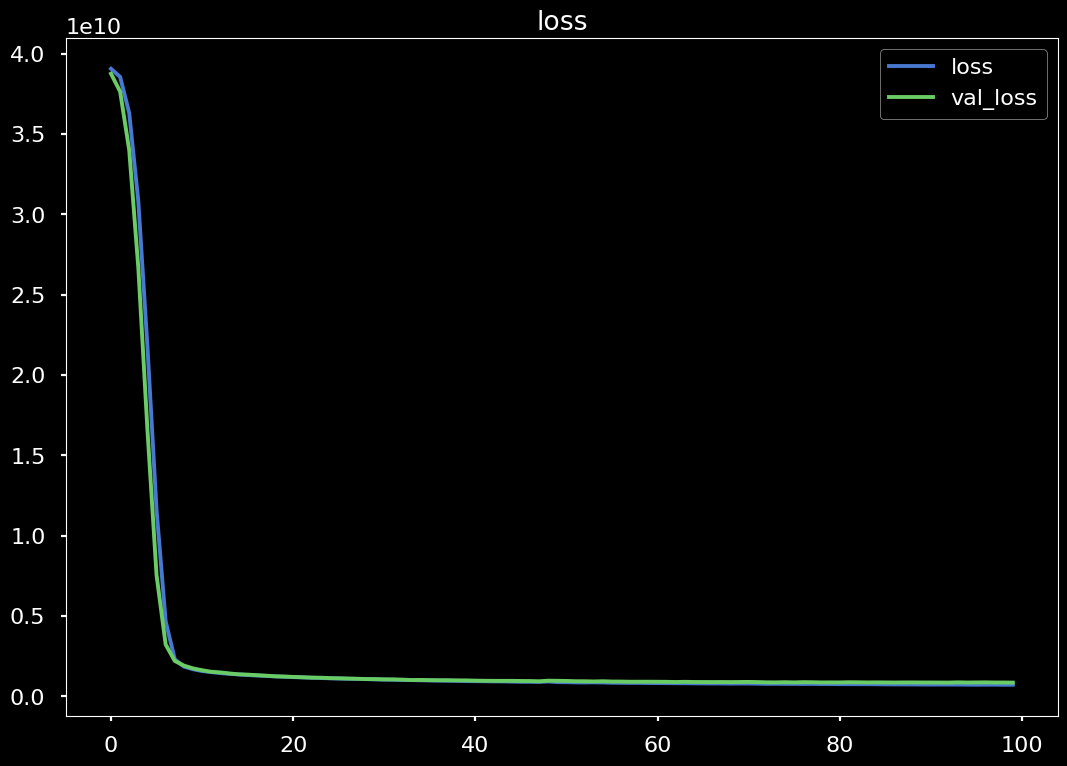

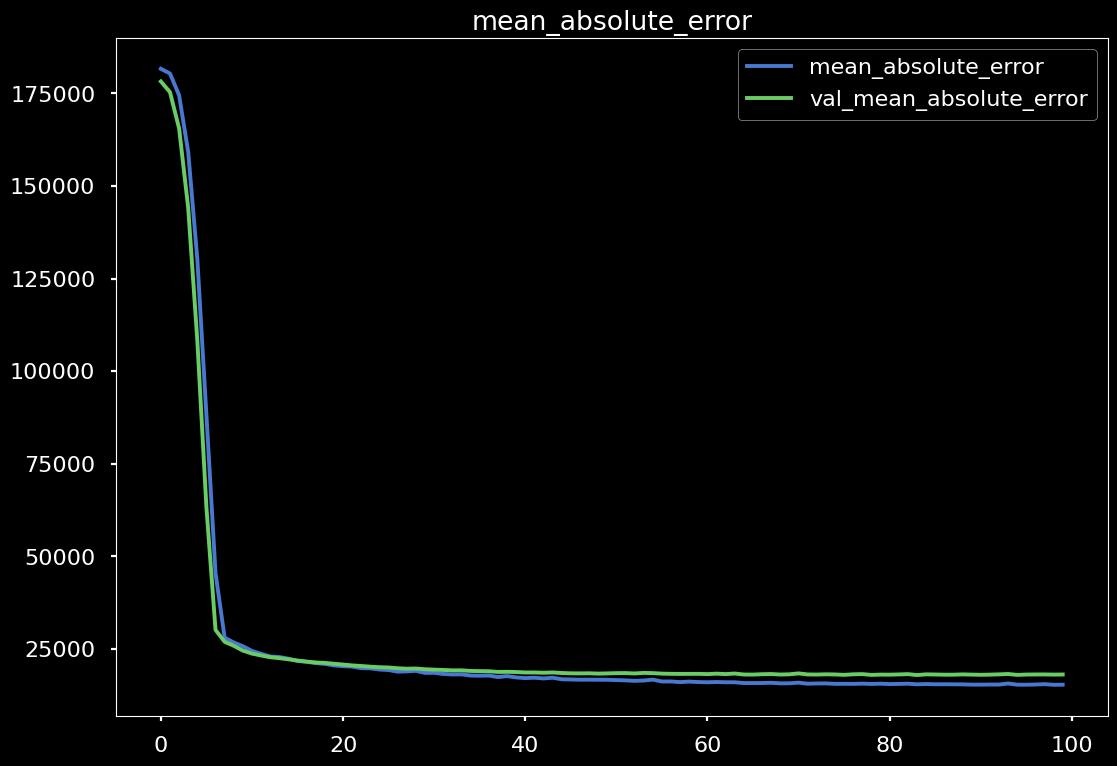

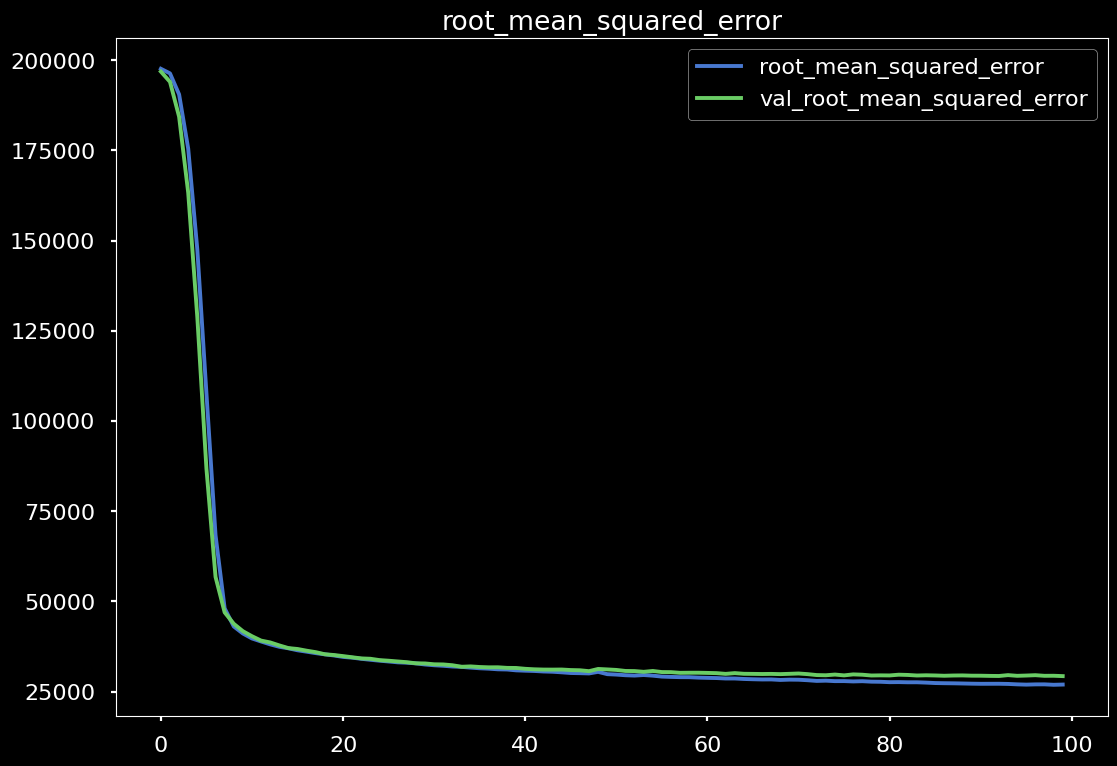

In [199]:
plot_history(history3)

In [200]:
# evaluate model

y_pred_final = model3.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred_final)}')
print(f'final R2: {r2_score(y_test, y_pred_final)}')

12/12 [==============================] - 0s 3ms/step
final RMSE: 29295.995384961785
final MAE: 18086.153028681507
final R2: 0.8774850132687436


I will select this final model for machine learning.